<p style="font-family: 'Arial', sans-serif; font-size: 3rem; color: #6a1b9a; text-align: center; margin: 0; 
           text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.1); background-color: #f5f5f5; padding: 10px; 
           border-radius: 10px; border: 4px solid #6a5acd; box-shadow: 2px 2px 12px rgba(0, 0, 0, 0.1); width: 97%;">
    <span style="font-weight: bold; color: #6a1b9a; animation: pulse 2s infinite;"></span>COMPX310-2025 Lab 7 <br> Support Vector Machines
<br>Banking Marketing Campaign Analysis</p>

<div align="center">
  <img src="https://www.driveresearch.com/wp-content/uploads/2024/10/bank-marketing-strategies.jpg" width="800" height="500">
</div>

### Lab Overview
**Total Points: 3**

In this lab, you will apply **Support Vector Machines (SVM)** for classification and **Support Vector Regression (SVR)** to analyze banking data.

### Learning Objectives
- Understand and apply Support Vector Machines for classification
- Implement Support Vector Regression for numerical prediction
- Evaluate model performance using appropriate metrics

---

<div align="center">
  <img src="https://ts2.tc.mm.bing.net/th/id/OIP-C.JFff7dHIUtNoMov7paoXRQHaEq?rs=1&pid=ImgDetMain&o=7&rm=3" width="800" height="500">
</div>

## 1. Business Understanding

### Background
StirBank has been running marketing campaigns to encourage customers to set up regular savings deposits. However, calling many customers is costly and risks annoying people. The bank needs a data-driven approach to identify which customers are most likely to respond positively.

### Problem Statement
**Part 1 - Classification Task:** Predict whether a customer will make a deposit (`made_deposit`) based on their characteristics and previous interactions.

**Part 2 - Regression Task:** Predict a customer's current balance based on their demographic and banking characteristics.

### Why Data Mining?
Data mining is suitable because:
- We have historical data with known outcomes
- The relationships between variables are complex and non-linear
- Manual rules would be difficult to create and maintain
- Automated prediction can save costs and improve targeting

### Key Terminology
- **Model**: A mathematical representation learned from data
- **Features/Variables**: Input attributes used for prediction
- **Target**: The variable we want to predict
- **SVM**: Support Vector Machine - finds optimal decision boundaries
- **Kernel**: Function that transforms data into higher dimensions
- **Hyperparameters**: Parameters that control the learning process (C, gamma, kernel type)

---

## 2. Import Required Libraries

Import all necessary Python libraries for this lab. You will need:
- Data manipulation libraries (pandas, numpy)
- Visualization libraries (matplotlib, seaborn)
- Preprocessing tools from scikit-learn (StandardScaler, LabelEncoder, train_test_split)
- SVM models from scikit-learn (SVC for classification, SVR for regression)
- Model selection tools (GridSearchCV for hyperparameter tuning)
- Evaluation metrics for both classification and regression tasks
- Configure any necessary settings (warnings, plot styles)

In [55]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

---
## 3. Data Understanding 

### Load and Explore the Dataset

Load the 'bank-tr.csv' file and perform initial exploration:
- Read the CSV file into a pandas DataFrame
- Display the shape of the dataset (should be 8000 rows × 20 columns)
- Show the first few rows to understand the data structure
- Display information about column data types and any missing values

In [38]:
df = pandas.read_csv("bank-tr.csv")

print("Shape of data: ")
print(df.shape)

# print("First five rows: ")
# print(df.head())

print("Feature names: ")
print(df.columns)

print("Missing values: ")
print(df.isnull().sum())

Shape of data: 
(8000, 20)
Feature names: 
Index(['accountID', 'town', 'country', 'age', 'job', 'marital', 'education',
       'defaulted?', 'current_balance', 'housing', 'has_loan', 'last_contact',
       'cc_tr', 'last_contact_day', 'last_contact_month', 'campaign',
       'days_since_last_contact', 'previous', 'poutcome', 'made_deposit'],
      dtype='object')
Missing values: 
accountID                  0
town                       0
country                    0
age                        0
job                        0
marital                    0
education                  0
defaulted?                 0
current_balance            0
housing                    0
has_loan                   0
last_contact               0
cc_tr                      0
last_contact_day           0
last_contact_month         0
campaign                   0
days_since_last_contact    0
previous                   0
poutcome                   0
made_deposit               0
dtype: int64


### Data Dictionary

Review the variables in the dataset and fill type and Usefulness.
- Go through each column and classify it as **categorical** or **numerical**
- Mark it as **1 nominal, 2 ordinal, 3 continuous, or 4 discrete**
- Decide whether it is useful for prediction or should be dropped

| Variable | Description | Type | Usefulness |
|----------|-------------|------|------------|
| accountID | Unique customer identifier | 2 | N |
| town | Customer's town | 1 | Y |
| country | Customer's country | 1 | Y |
| age | Customer's age | 4 | Y |
| job | Type of job | 1 | Y |
| marital | Marital status | 4 | Y |
| education | Education level | 2 | Y |
| defaulted? | Has credit in default | 4 | Y |
| current_balance | Current account balance | 4 | Y |
| housing | Has housing loan | 4 | Y |
| has_loan | Has personal loan | 4 | Y |
| last_contact | Contact communication type | 1 | Y |
| cc_tr | Number of contacts in campaign | 4 | Y |
| last_contact_day | Day of last contact | 4 | N |
| last_contact_month | Month of last contact | 4 | Y |
| campaign | Number of contacts in this campaign | 4 | Y |
| days_since_last_contact | Days since previous campaign | 4 | Y |
| previous | Number of previous contacts | 4 | Y |
| poutcome | Outcome of previous campaign | 4 | Y |
| made_deposit | Did customer make deposit? (**TARGET VARIABLE**) | 4 | Y |

---


### Summary Statistics

Generate and display summary statistics:
- Use appropriate pandas methods to display summary statistics for numerical variables
- For categorical variables, display the unique values and their frequencies
- Check for any missing values in the dataset

In [39]:
num_features = [c for c in df.columns if df[c].dtype != "O"]
cat_features = [c for c in df.columns if df[c].dtype == "O"]

print("Summary for numerical feature: ")
print(df[num_features].describe())

print("Unique values for categorical feature: ")
print(df[cat_features].value_counts())

Summary for numerical feature: 
          accountID          age  current_balance        cc_tr  \
count  8.000000e+03  8000.000000      8000.000000  8000.000000   
mean   5.540746e+07    41.211750      1516.520500     3.011250   
std    2.596137e+07    11.972545      3168.517624     1.419903   
min    1.000040e+07    18.000000     -3058.000000     1.000000   
25%    3.305826e+07    32.000000       120.000000     2.000000   
50%    5.558780e+07    39.000000       545.500000     3.000000   
75%    7.769044e+07    49.000000      1694.000000     4.000000   
max    9.999599e+07    93.000000     81204.000000     5.000000   

       last_contact_day     campaign  days_since_last_contact     previous  
count        8000.00000  8000.000000              8000.000000  8000.000000  
mean           15.70875     2.497125                51.573375     0.840375  
std             8.43299     2.770145               109.155207     2.371307  
min             1.00000     1.000000                -1.000000    

### Target Variable Analysis

Analyze the distribution of the target variable 'made_deposit':
- Display value counts and percentages
- Create visualizations to show the distribution (bar chart and/or pie chart)
- Assess whether the classes are balanced or imbalanced
- Comment on what you observe about the class distribution

made_deposit
no     4172
yes    3828
Name: count, dtype: int64
0.5215
0.4785


C:\Users\HP\AppData\Local\Temp\ipykernel_14520\1590261573.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df["made_deposit"].value_counts()[0] / df["made_deposit"].value_counts().sum())
C:\Users\HP\AppData\Local\Temp\ipykernel_14520\1590261573.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df["made_deposit"].value_counts()[1] / df["made_deposit"].value_counts().sum())


Text(0.5, 0, 'Number')

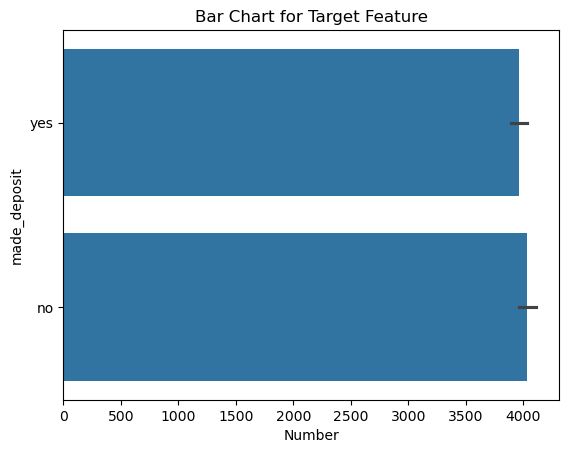

In [40]:
print(df["made_deposit"].value_counts())

print(df["made_deposit"].value_counts()[0] / df["made_deposit"].value_counts().sum())
print(df["made_deposit"].value_counts()[1] / df["made_deposit"].value_counts().sum())

sns.barplot(df["made_deposit"])
plt.title("Bar Chart for Target Feature")
plt.xlabel("Number")

# Balanced. 

---
## 4. Data Preparation 

### Step 4.1: Data Quality Assessment

Examine the data for quality issues:
- Check for any inconsistent values in categorical columns (e.g., different spellings or abbreviations)
- Look specifically at binary columns like 'housing', 'has_loan', and 'defaulted?' for any unexpected values
- Identify any typos or data entry errors that need correction
- Document any issues you find

### Step 4.2: Data Cleaning

Clean any data quality issues you identified:
- Create a copy of the dataframe for processing
- Fix any inconsistent values (e.g., standardize abbreviations)
- Document what changes you made and why
- Verify that the cleaning was successful by checking the unique values again

In [41]:
df_copy = df.copy()


### Step 4.3: Visualize Distributions (Before Preprocessing)

Create histograms to visualize the distribution of key numerical variables:
- Select important numerical features (age, current_balance, campaign, days_since_last_contact, previous)
- Create histogram plots to understand their distributions
- Look for skewness, outliers, or unusual patterns
- These visualizations will help you understand if any transformations are needed

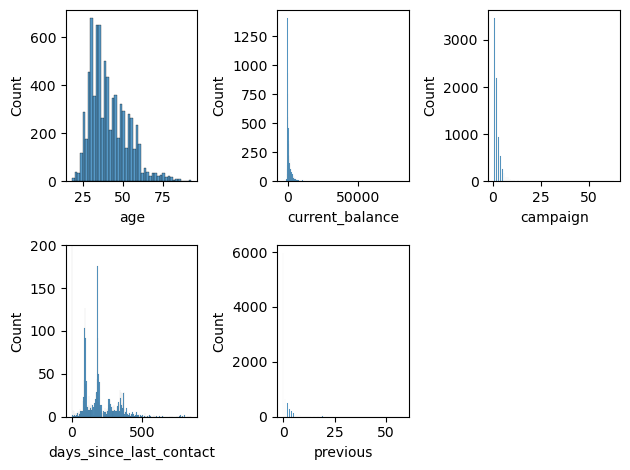

In [42]:
ipt_num_features = ["age", "current_balance", "campaign", "days_sicne_last_contact", "previous"]

plt.subplot(2, 3, 1)
sns.histplot(df["age"])

plt.subplot(2, 3, 2)
sns.histplot(df["current_balance"])

plt.subplot(2, 3, 3)
sns.histplot(df["campaign"])

plt.subplot(2, 3, 4)
sns.histplot(df["days_since_last_contact"])
plt.ylim(0, 200)

plt.subplot(2, 3, 5)
sns.histplot(df["previous"])

plt.tight_layout()

### Step 4.4: Remove Irrelevant Features

Remove features that won't contribute to prediction:
- Drop the 'accountID' column (it's just an identifier with no predictive value)
- Drop the 'country' column (all values are the same - UK, so it provides no information)
- Consider whether to keep or drop 'town' (too many unique values may not be useful)
- Print the remaining columns to verify the changes

In [43]:
df_copy.drop("accountID", axis=1, inplace=True)
df_copy.drop("country", axis=1, inplace=True)
df_copy.drop("town", axis=1, inplace=True)

print("Feature names after preprocessing: ")
print(df_copy.columns)

Feature names after preprocessing: 
Index(['age', 'job', 'marital', 'education', 'defaulted?', 'current_balance',
       'housing', 'has_loan', 'last_contact', 'cc_tr', 'last_contact_day',
       'last_contact_month', 'campaign', 'days_since_last_contact', 'previous',
       'poutcome', 'made_deposit'],
      dtype='object')


### Step 4.5: Feature Engineering (Optional)

Create new features that might improve model performance:
- Consider creating a binary feature indicating whether the customer was contacted before
- Consider creating age groups from the continuous age variable
- Think about other features that might be useful based on domain knowledge
- Document any new features you create and your reasoning

---
## 5. Modeling - Part 1: SVM Classification

### Objective
Build a Support Vector Machine classifier to predict whether a customer will make a deposit.

### Step 5.1: Prepare Data for Classification

Separate features and target variable:
- Create X (features) by dropping the target column 'made_deposit' and any variables you won't use
- Create y (target) from the 'made_deposit' column
- Convert the target to binary format (1 for 'yes', 0 for 'no')
- Verify the shapes and distribution of your features and target

In [44]:
X = df_copy.iloc[:, :-1]
y = df_copy.iloc[:, -1]

y = y.map({"yes": 1, "no": 0})

print(X.shape)
print(y.shape)
print(y.head())

(8000, 16)
(8000,)
0    1
1    1
2    1
3    0
4    1
Name: made_deposit, dtype: int64


### Step 5.2: Encode Categorical Variables

Convert categorical variables to numerical format:
- Identify which columns are categorical and which are numerical
- Use LabelEncoder to encode categorical variables into numerical values
- Store the encoders in a dictionary in case you need them later
- Verify that all columns are now numerical

In [45]:
num_features = [c for c in X.columns if df[c].dtype != "O"]
cat_features = [c for c in X.columns if df[c].dtype == "O"]

X[num_features] = StandardScaler().fit_transform(X[num_features])

for col in cat_features:
    labelencoder = LabelEncoder()
    X[col] = labelencoder.fit_transform(X[col])

print("Shape of X after preprocessing: ")
print(X.shape)

Shape of X after preprocessing: 
(8000, 16)


### Step 5.3: Split Data into Train, Validation, and Test Sets

Create three datasets for proper model evaluation:
- Split the data into 60% training, 20% validation, and 20% test
- First split 80-20 for (train+validation) and test
- Then split the 80% into 75-25 to get 60% train and 20% validation
- Use stratification to maintain class balance across splits
- Set random_state=42 for reproducibility
- Print the sizes of each set to verify the split

In [46]:
X_plus, X_test, y_plus, y_test = train_test_split(X, y, random_state=6327, test_size=0.2, stratify=y)

X_training, X_val, y_training, y_val = train_test_split(X_plus, y_plus, random_state=6327, test_size=0.25, stratify=y_plus)

print("Shape of X_training: ")
print(X_training.shape)
print("Shape of X_val: ")
print(X_val.shape)
print("Shape of X_test: ")
print(X_test.shape)

Shape of X_training: 
(4800, 16)
Shape of X_val: 
(1600, 16)
Shape of X_test: 
(1600, 16)


### Step 5.4: Feature Scaling

**⚠️ CRITICAL:** SVMs are very sensitive to feature scales. You must standardize features.

Apply StandardScaler to normalize features:
- Initialize a StandardScaler
- Fit the scaler on the training data ONLY
- Transform all three sets (train, validation, test) using the fitted scaler
- Never fit the scaler on validation or test data to avoid data leakage
- Verify that the scaled features have mean≈0 and std≈1

In [47]:
stdscaler = StandardScaler()

X_train_scaled = stdscaler.fit_transform(X_training)

X_val_scaled = stdscaler.transform(X_val)
X_test_scaled = stdscaler.transform(X_test)

print("Mean of scaled features: ")
print(np.mean(X_train_scaled, axis=0))  
print("Std of scaled features: ")
print(np.std(X_train_scaled, axis=0))  

Mean of scaled features: 
[ 4.07081776e-18  6.80936788e-17 -4.66293670e-17 -7.54951657e-17
 -4.21884749e-17  4.44089210e-18 -5.62512999e-17  2.48689958e-16
  7.84557604e-17 -4.07081776e-17  2.07241631e-17  1.37667655e-16
  6.06921920e-17  3.25665421e-17 -2.96059473e-18  2.96059473e-17]
Std of scaled features: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Step 5.5: Build Baseline SVM Model

Create a simple baseline SVM model:
- Initialize an SVC (Support Vector Classifier) with default parameters
- Use the RBF kernel (this is the default)
- Train the model on the scaled training data
- Make predictions on the validation set
- Calculate and display the accuracy score
- Print a classification report showing precision, recall, and F1-score

In [48]:
svc_1 = SVC()

svc_1.fit(X_train_scaled, y_training)

y_pred_val = svc_1.predict(X_val_scaled)

acc_score = accuracy_score(y_val, y_pred_val)
print("Accuracy score of validation set is: ")
print(acc_score)

print(classification_report(y_val, y_pred_val))

Accuracy score of validation set is: 
0.70375
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       835
           1       0.72      0.62      0.67       765

    accuracy                           0.70      1600
   macro avg       0.71      0.70      0.70      1600
weighted avg       0.71      0.70      0.70      1600



### Step 5.6: Hyperparameter Tuning

Use GridSearchCV to find the best hyperparameters:
- Define a parameter grid with different values for:
  - **C**: Regularization parameter (try 0.1, 1, 10, 100)
  - **gamma**: Kernel coefficient (try 'scale', 'auto', 0.001, 0.01, 0.1)
  - **kernel**: Kernel type (try 'rbf' and 'linear')
- Create a GridSearchCV object with 5-fold cross-validation
- Fit the grid search on the training data
- Display the best parameters found
- Display the best cross-validation score
- This process may take several minutes to complete

In [49]:
parameter_grid = {"C": [0.1, 1, 10, 100], "gamma": ["scale", "auto", 0.001, 0.01, 0.1], "kernel": ["rbf", "linear"]}

gs = GridSearchCV(estimator=SVC(), cv=5, param_grid=parameter_grid, refit=True, n_jobs=-1)

gs.fit(X_train_scaled, y_training)

print("Best parameters: ")
print(gs.best_params_)
print("Best score:")
print(gs.best_score_)

Best parameters: 
{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best score:
0.678125


### Step 5.7: Analyze Grid Search Results

Examine the grid search results:
- Extract the cv_results_ from the grid search
- Create a DataFrame to view the results in a structured format
- Display the top 10 parameter combinations
- Note which parameters seem to work best
- Compare different kernels and their performance

In [50]:
print("Results of gridsearchCV: ")
res_gs = pandas.DataFrame(gs.cv_results_)
# print(res_gs)

res_gs_sorted = res_gs.sort_values("rank_test_score")
print(res_gs_sorted.head(10))

Results of gridsearchCV: 
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
12       0.740717      0.027413         0.330817        0.014671       1   
18       0.772692      0.059544         0.330987        0.039141       1   
10       0.728141      0.035237         0.312712        0.017719       1   
26       0.777154      0.088764         0.311215        0.034902      10   
8        0.699993      0.070632         0.345447        0.027214     0.1   
0        0.674844      0.067155         0.326684        0.013318     0.1   
2        0.675739      0.073374         0.354680        0.031684     0.1   
34       0.906341      0.097309         0.320835        0.022938     100   
36       1.426792      0.115784         0.298574        0.024764     100   
16       0.693231      0.078799         0.321754        0.025622       1   

   param_gamma param_kernel                                         params  \
12        auto          rbf     {'C': 1, 'gamma': 'auto', '

### Step 5.8: Train Final SVM Model

Use the best model from grid search:
- Extract the best estimator from the grid search results
- Make predictions on the validation set
- Calculate accuracy and compare it to the baseline model
- Print a detailed classification report
- Note the improvement (if any) over the baseline

In [53]:
y_pred_gs = gs.predict(X_val_scaled)

acc_score_gs = accuracy_score(y_val, y_pred_gs)
print("accuracy score of gsCV: ")
print(acc_score_gs)

print("classification report of gsCV: ")
print(classification_report(y_val, y_pred_gs))

accuracy score of gsCV: 
0.70375
classification report of gsCV: 
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       835
           1       0.72      0.62      0.67       765

    accuracy                           0.70      1600
   macro avg       0.71      0.70      0.70      1600
weighted avg       0.71      0.70      0.70      1600



### Step 5.9: Final Evaluation on Test Set

Evaluate the final model on unseen test data:
- Use the best model to make predictions on the test set
- Calculate and display the test accuracy
- Generate a comprehensive classification report
- This is your final model performance - report these numbers

In [54]:
y_pred_text = gs.predict(X_test_scaled)

print("Acccuracy of best model: ")
print(accuracy_score(y_test, y_pred_text))

print("classification report of best model: ")
print(classification_report(y_test, y_pred_text))

Acccuracy of best model: 
0.69875
classification report of best model: 
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       834
           1       0.71      0.63      0.67       766

    accuracy                           0.70      1600
   macro avg       0.70      0.70      0.70      1600
weighted avg       0.70      0.70      0.70      1600



---
## 6. Evaluation - Classification 

### Step 6.1: Confusion Matrix

Create and visualize a confusion matrix:
- Generate a confusion matrix comparing actual vs predicted values
- Visualize it using a heatmap with proper labels
- Extract the four values: True Negatives, False Positives, False Negatives, True Positives
- Interpret what each quadrant means:
  - True Negatives: Correctly predicted "No deposit"
  - False Positives: Predicted "Deposit" but actually "No" (Type I error)
  - False Negatives: Predicted "No" but actually "Deposit" (Type II error)
  - True Positives: Correctly predicted "Deposit"
- Discuss the business implications of each type of error

confusion matrix of best model: 
[[635 199]
 [283 483]]


<Axes: >

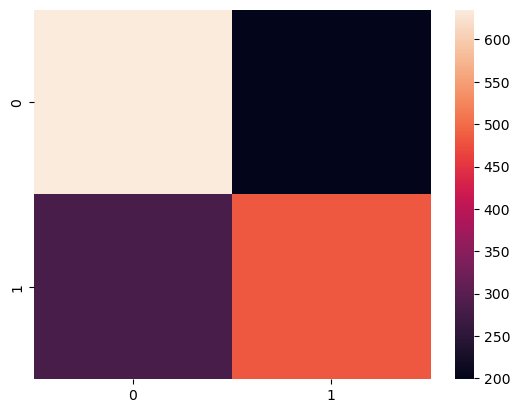

In [57]:
confusion_m = confusion_matrix(y_test, y_pred_text)
print("confusion matrix of best model: ")
print(confusion_m)

sns.heatmap(confusion_m)

### Step 6.2: ROC Curve and AUC Score

Generate and plot the ROC (Receiver Operating Characteristic) curve:
- Train a new SVM with probability=True to get probability predictions
- Use the same best parameters from grid search
- Get probability predictions for the positive class on the test set
- Calculate the false positive rate, true positive rate, and thresholds
- Calculate the AUC (Area Under Curve) score
- Plot the ROC curve with a diagonal reference line
- Interpret the AUC score:
  - 0.9-1.0: Excellent
  - 0.8-0.9: Good
  - 0.7-0.8: Fair
  - Below 0.7: Poor

In [ ]:
svm_2 = SVC(probability=True, C=1, gamma='auto', kernel='rbf')

svm_2.fit(X_train_scaled, y_training)



### Step 6.3: Error Analysis by Segments

Analyze where the model performs well and where it struggles:
- Create a dataframe combining test features, actual values, and predictions
- Add a column indicating whether the prediction was correct
- Calculate accuracy for different customer segments (e.g., by job type, age group, marital status)
- Identify segments where the model performs poorly
- Discuss potential reasons for lower performance in certain segments
- Suggest improvements based on this analysis

---
## 7. Modeling - Part 2: Support Vector Regression

### Objective
Build a Support Vector Regression model to predict a customer's current_balance.

### Step 7.1: Prepare Data for Regression

Set up the regression task:
- Create X (features) by dropping 'current_balance' (target), 'made_deposit' (classification target), and any engineered features you won't use
- Create y (target) as the 'current_balance' column
- Display summary statistics of the target variable
- Create visualizations (histogram and boxplot) to understand the distribution of current_balance
- Note any skewness or outliers in the target variable

### Step 7.2: Encode Categorical Variables

Encode categorical features for regression:
- Identify categorical and numerical columns
- Apply LabelEncoder to each categorical column
- Store encoders for potential future use
- Verify all columns are now numerical

### Step 7.3: Split Data for Regression

Create train, validation, and test sets:
- Use the same 60-20-20 split strategy as in classification
- First split: 80% (train+val) and 20% test
- Second split: 75% train and 25% validation from the 80%
- Use random_state=42 for reproducibility
- Print the sizes of each set

### Step 7.4: Feature Scaling for Regression

Scale both features and target variable:
- Initialize two StandardScalers: one for features (X) and one for target (y)
- Fit the feature scaler on training features and transform all three sets
- Fit the target scaler on training target and transform all three target sets
- Note: Scaling the target helps SVR performance, but remember to inverse transform predictions
- Verify the scaling was applied correctly

### Step 7.5: Build Baseline SVR Model

Create a baseline Support Vector Regression model:
- Initialize an SVR with default parameters and RBF kernel
- Train on the scaled training data
- Make predictions on the validation set (remember these are scaled)
- Inverse transform the predictions to get them back to original scale
- Calculate and display:
  - RMSE (Root Mean Squared Error)
  - MAE (Mean Absolute Error)
  - R² Score (coefficient of determination)
- Interpret these metrics in the context of the problem

### Step 7.6: Hyperparameter Tuning for SVR

Find optimal hyperparameters using GridSearchCV:
- Define a parameter grid with:
  - **C**: Regularization (try 0.1, 1, 10, 100)
  - **gamma**: Kernel coefficient (try 'scale', 'auto', 0.001, 0.01)
  - **epsilon**: Epsilon-tube (try 0.01, 0.1, 0.2)
  - **kernel**: Kernel type (try 'rbf', 'linear')
- Use GridSearchCV with 5-fold cross-validation
- Use 'neg_mean_squared_error' as the scoring metric
- Fit on the scaled training data
- Display the best parameters and best score
- Note: This may take several minutes

### Step 7.7: Train Final SVR Model

Evaluate the tuned SVR model:
- Extract the best estimator from grid search
- Make predictions on the validation set
- Inverse transform predictions to original scale
- Calculate RMSE, MAE, and R² score
- Compare with the baseline model
- Report the improvement achieved through tuning

### Step 7.8: Final SVR Evaluation on Test Set

Evaluate the final SVR model on unseen test data:
- Use the best model to predict on the test set
- Inverse transform predictions
- Calculate and display final test metrics (RMSE, MAE, R²)
- Compare test performance with validation performance
- Report the mean and standard deviation of the target variable for context

---
## 8. Evaluation - Regression

### Step 8.1: Predicted vs Actual Values

Visualize model predictions:
- Create a scatter plot with actual values on x-axis and predicted values on y-axis
- Add a diagonal reference line representing perfect predictions
- Format the plot with proper labels and title
- Interpret the plot:
  - Points close to the line indicate good predictions
  - Systematic deviations suggest bias
  - Spread around the line indicates variance in predictions

### Step 8.2: Residual Analysis

Analyze prediction errors:
- Calculate residuals (actual - predicted)
- Create two plots:
  1. Residual plot: residuals vs predicted values
  2. Histogram of residuals
- Check for patterns in the residual plot:
  - Random scatter is good (homoscedasticity)
  - Patterns suggest model is missing something
  - Funnel shape suggests heteroscedasticity
- Check if residuals are normally distributed (from histogram)
- Calculate and display residual statistics (mean, std, min, max)
- Ideally, mean should be close to 0

---
## 9. Summary and Conclusions

### Step 9.1: Comprehensive Performance Summary

Create a comprehensive summary of both models:
- Summarize classification results:
  - Best hyperparameters found
  - Test accuracy
  - AUC score
  - Confusion matrix breakdown
- Summarize regression results:
  - Best hyperparameters found
  - Test RMSE, MAE, R²
  - Typical prediction error
- Compare both models' performance relative to baselines

### Step 9.2: Business Insights and Recommendations

Write a text analysis covering:

**Key Findings:**
- What did you learn about customer behavior from the classification model?
- What factors seem most important for predicting deposits?
- How accurate is the balance prediction from regression?

**Business Recommendations:**
- How should StirBank use the classification model?
- Which customers should they prioritize for marketing calls?
- What is the cost-benefit trade-off between false positives and false negatives?
- Should they consider different strategies for different customer segments?

**Model Limitations:**
- Where do the models perform poorly?
- What assumptions might not hold in practice?
- How might model performance degrade over time?

---
## Reflection Questions

Answer the following questions based on your work:

1. **Kernel Selection:** How does the RBF kernel differ from the linear kernel? When might you prefer one over the other?

2. **Hyperparameter C:** What is the role of the C parameter in SVM? What happens when C is very large? Very small?

3. **Feature Scaling:** Why is feature scaling critical for SVM? What would happen if you forgot to scale?

4. **Error Trade-offs:** In the classification task, which is worse for the bank: false positives or false negatives? Why?

5. **Model Improvements:** Based on your analysis, what are three specific ways you could improve these models?

6. **CRISP-DM:** How did following the CRISP-DM framework help structure your analysis? What stages were most important?

7. **Practical Deployment:** What challenges might arise when deploying these models in production at StirBank?

---
**End of Lab 07**

### Submission Checklist:
- ✅ All code cells executed without errors
- ✅ All visualizations displayed correctly
- ✅ Results interpreted and explained
- ✅ Reflection questions answered
- ✅ Business recommendations provided
- ✅ Code is well-commented and readable